In [5]:
import cv2
import numpy as np
from skimage import io      # Only needed for web grabbing images; use cv2.imread(...) for local images

# Read images
frame = cv2.cvtColor(io.imread('crop.png'), cv2.COLOR_RGB2BGR)
image = cv2.cvtColor(io.imread('nature.jpg'), cv2.COLOR_RGB2BGR)

# Color threshold red frame; single color here, more sophisticated solution would be using cv2.inRange
mask = 255 * np.uint8(np.all(frame == [36,28,237], axis=2))

# Find inner contour of frame; get coordinates
contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnt = min(contours, key=cv2.contourArea)
(x, y, w, h) = cv2.boundingRect(cnt)

# Copy appropriately resized image to frame
frame[y:y+h, x:x+w] = cv2.resize(image, (w, h))

cv2.imshow('frame', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()



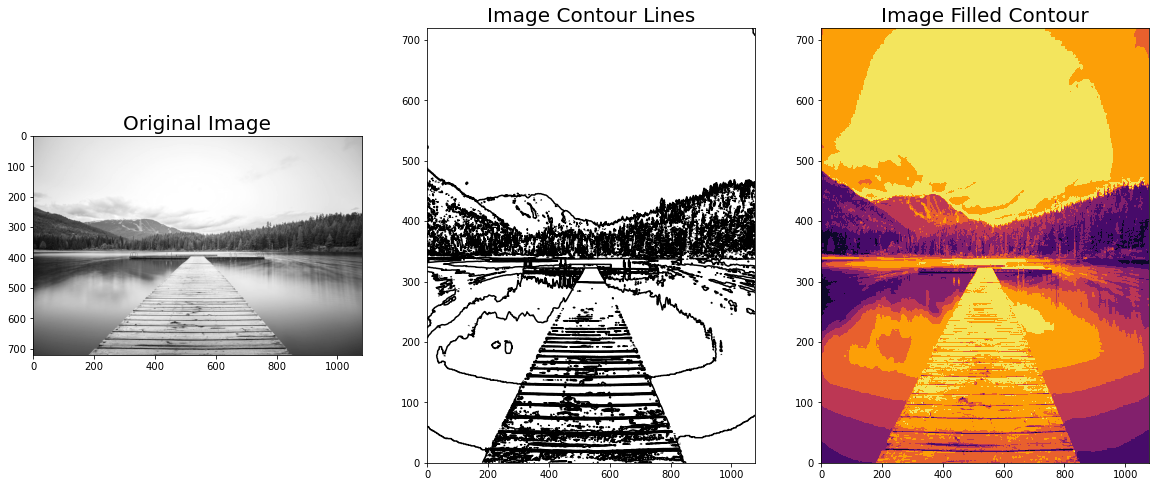

In [3]:
#contour
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
import cv2
import imageio
from imageio import imread
im = rgb2gray(imread("bridge.jpg")) # read the image from disk as a numpy ndarray
plt.figure(figsize=(20,8))
plt.subplot(131), plt.imshow(im, cmap='gray'), plt.title('Original Image',size=20)
plt.subplot(132), plt.contour(np.flipud(im), colors='k',levels=np.logspace(-15, 15, 100))
plt.title('Image Contour Lines', size=20)
plt.subplot(133), plt.title('Image Filled Contour',size=20),
plt.contourf(np.flipud(im), cmap='inferno')
plt.show()

In [ ]:
#logo removal 
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
from skimage import io
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color
image_with_logo = plt.imread('logo.png')

#plot_comparison
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    #ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    #ax2.axis('off')

# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:290, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,
                                                mask,
                                                multichannel=True)

# Show the original and logo removed images
plot_comparison(image_with_logo, image_logo_removed, 'Image with logo removed')

In [ ]:
#logo removal
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
from skimage import io
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color
image_with_logo = plt.imread('logo1.jpg')

#plot_comparison
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    #ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    #ax2.axis('off')
    


# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[20:110, 80:190] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,
                                                mask,
                                                multichannel=True)

# Show the original and logo removed images
plot_comparison(image_with_logo, image_logo_removed, 'Image with logo removed')